In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\sathv\Documents\Coding\ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_data(dataset_handle: str, file_name: str) -> pd.DataFrame:
    path = kagglehub.dataset_download(dataset_handle)    
    full_path = os.path.join(path, file_name)
    return pd.read_csv(full_path, encoding='latin1')

df = load_data("dansbecker/nba-shot-logs", "shot_logs.csv")

In [3]:
df = df.dropna()
df.isnull().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

In [4]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148


In [5]:
new_df = df.drop(columns=["PERIOD", "GAME_ID","MATCHUP", "FINAL_MARGIN", "PTS_TYPE", "PTS", "SHOT_NUMBER", "LOCATION", "W", "GAME_CLOCK", "player_id", "SHOT_RESULT", "CLOSEST_DEFENDER", "player_name", "CLOSEST_DEFENDER_PLAYER_ID"], errors='ignore')
new_df.head()

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,FGM
0,10.8,2,1.9,7.7,1.3,1
1,3.4,0,0.8,28.2,6.1,0
3,10.3,2,1.9,17.2,3.4,0
4,10.9,2,2.7,3.7,1.1,0
5,9.1,2,4.4,18.4,2.6,0


In [6]:
# Clipping shot distances and closest defender distances to remove outliers
new_df["SHOT_DIST"] = new_df["SHOT_DIST"].clip(upper=30)
new_df["CLOSE_DEF_DIST"] = new_df["CLOSE_DEF_DIST"].clip(upper=6)
new_df["SHOT_CLOCK"] = new_df["SHOT_CLOCK"].clip(upper=24)
new_df.describe()

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,FGM
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,12.453344,1.989233,2.748202,13.439920,3.684755,0.456156
std,5.763265,3.411188,2.957237,8.768497,1.712111,0.498076
min,0.000000,0.000000,-100.500000,0.000000,0.000000,0.000000
25%,8.200000,0.000000,0.900000,4.700000,2.300000,0.000000
50%,12.300000,1.000000,1.600000,13.400000,3.700000,0.000000
75%,16.675000,2.000000,3.700000,22.400000,5.300000,1.000000
max,24.000000,32.000000,24.900000,30.000000,6.000000,1.000000


C:\Users\sathv\AppData\Local\Temp\ipykernel_43704\3168902968.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_per_bin = pd.Series(new_df.groupby("SHOT_DIST_BIN")["FGM"].sum())
C:\Users\sathv\AppData\Local\Temp\ipykernel_43704\3168902968.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fg_percentage_per_bin = pd.Series(new_df.groupby("SHOT_DIST_BIN")["FGM"].mean())


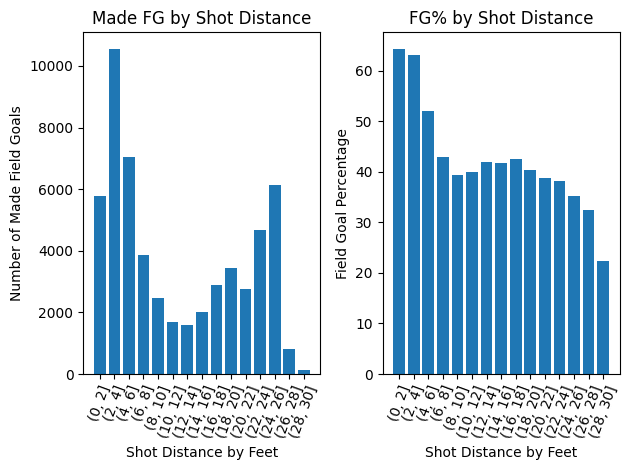

In [7]:
new_df["SHOT_DIST_BIN"] = pd.cut(new_df["SHOT_DIST"], bins=range(0, 32, 2))
count_per_bin = pd.Series(new_df.groupby("SHOT_DIST_BIN")["FGM"].sum())
plt.subplot(1, 2, 1)
plt.title("Made FG by Shot Distance")
plt.xticks(rotation=70)
plt.xlabel("Shot Distance by Feet")
plt.ylabel("Number of Made Field Goals")
plt.bar(count_per_bin.index.astype(str), count_per_bin.values)

plt.subplot(1, 2, 2)
fg_percentage_per_bin = pd.Series(new_df.groupby("SHOT_DIST_BIN")["FGM"].mean())
fg_percentage_per_bin *= 100
plt.title("FG% by Shot Distance")
plt.xticks(rotation=70)
plt.xlabel("Shot Distance by Feet")
plt.ylabel("Field Goal Percentage")
plt.bar(fg_percentage_per_bin.index.astype(str), fg_percentage_per_bin.values)
plt.tight_layout()
plt.show()

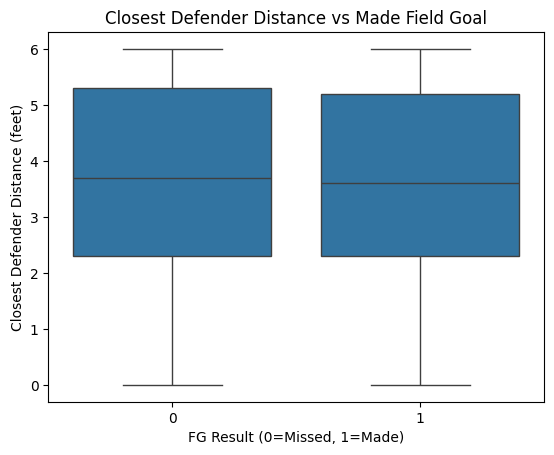

In [8]:
sns.boxplot(data=new_df, x="FGM", y="CLOSE_DEF_DIST")
plt.title("Closest Defender Distance vs Made Field Goal")
plt.xlabel("FG Result (0=Missed, 1=Made)")
plt.ylabel("Closest Defender Distance (feet)")
plt.show()

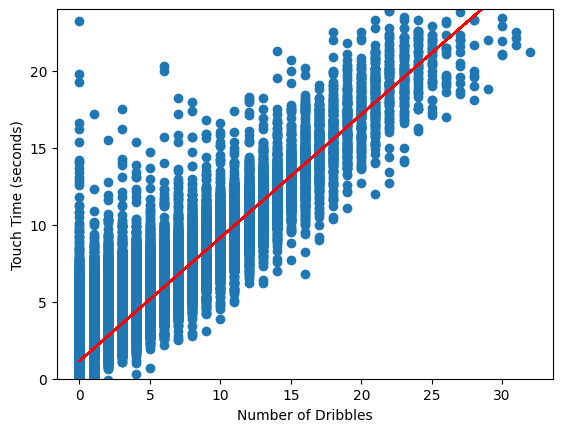

In [9]:
plt.xlabel("Number of Dribbles")
plt.ylabel("Touch Time (seconds)")
plt.ylim(0, 24)
x = new_df["DRIBBLES"]
y = new_df["TOUCH_TIME"]
b, a = np.polyfit(x, y, deg=1)
plt.scatter(x, y)
plt.plot(x, a + b * x, color='red')
plt.show()
# Number of dribbles and touch time have a directly proportional relationship, we can eliminate one of them

In [10]:
new_df = new_df.drop(columns=["TOUCH_TIME", "SHOT_DIST_BIN"], errors='ignore')
new_df.head()

,SHOT_CLOCK,DRIBBLES,SHOT_DIST,CLOSE_DEF_DIST,FGM
0,10.8,2,7.7,1.3,1
1,3.4,0,28.2,6.0,0
3,10.3,2,17.2,3.4,0
4,10.9,2,3.7,1.1,0
5,9.1,2,18.4,2.6,0


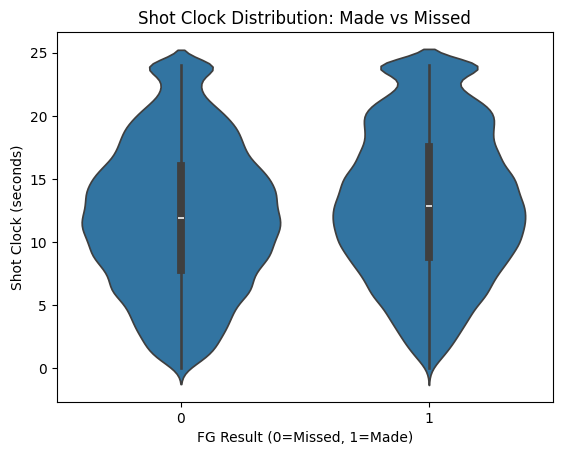

In [11]:
sns.violinplot(data=new_df, x="FGM", y="SHOT_CLOCK")
plt.title("Shot Clock Distribution: Made vs Missed")
plt.xlabel("FG Result (0=Missed, 1=Made)")
plt.ylabel("Shot Clock (seconds)")
plt.show()

Now we know that the most significant features for predicting whether a shot is made or missed are SHOT_DIST, CLOSE_DEF_DIST, DRIBBLES and SHOT_CLOCK.

In [12]:
# Using XGBoost to find feature importance
from sklearn.discriminant_analysis import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = new_df.drop(columns=["FGM"], errors='ignore')
y = new_df["FGM"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    objective='binary:logistic',
    eval_metric='logloss'
)
model.fit(X_train_scaled, y_train)
# predicted probabilities for the positive class (FGM==1)
y_preds = model.predict_proba(X_test_scaled)[:, 1]

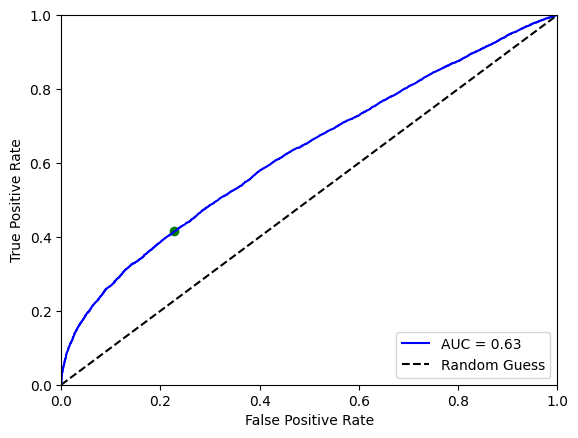

In [13]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds)
auc = metrics.auc(fpr, tpr)

j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = threshold[best_idx]

plt.plot(fpr, tpr, 'b', label = f'AUC = {auc:0.2f}')
plt.scatter(fpr[best_idx], tpr[best_idx], color='green')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
# best_threshold = 0.4685
preds = [1 if prob >= best_threshold else 0 for prob in y_preds]
accuracy = metrics.accuracy_score(y_test, preds)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 61.13%
